In [1]:
import numpy as np

#read in files
ats = []
Csca = np.zeros((146,146))
MD_corr = np.zeros((159,159))
ics = []

ats_infile =open("ats.txt")
for line in ats_infile:
    if len(line) >0:
        ats.append(line.replace("\n",""))

csca_infile = open("csca.csv")
i=0
for line in csca_infile:
    split_line = line.split(",")
    j=0
    for val in split_line:
        if len(val.replace("\n","")) > 0:
            Csca[i,j] = float(val)
            j += 1
    i += 1
    
ics_infile = open("ics.csv")
for line in ics_infile:
    split_line = line.split(":")[1].split(",")
    ic_list = []
    for val in split_line:
        if val != "-" and len(val.replace("\n","")) > 0:
            ic_list.append(val)
    ics.append(ic_list)
    
            
md_corr_infile = open("matrix_correl_CA.dat")
i = 0
for line in md_corr_infile:
    j=0
    split_line = line.split(" ")
    for val in split_line:
        if len(val.replace("\n","")) > 0:
            MD_corr[i,j] = float(val)
            j += 1
    i += 1

Csca_keep_index = []
ats_keep = []
for i in range(0, len(ats)):
    if ats[i] != "-":
        Csca_keep_index.append(i)
        ats_keep.append(int(ats[i]))
        
Csca_keep = Csca[Csca_keep_index,:]
Csca_keep = Csca_keep[:,Csca_keep_index]

MD_corr_keep = MD_corr[ats_keep,:]
MD_corr_keep = MD_corr_keep[:,ats_keep]
print(MD_corr_keep.shape)


(144, 144)


Text(0.5, 1.0, 'Statistical Coupling Matrix')

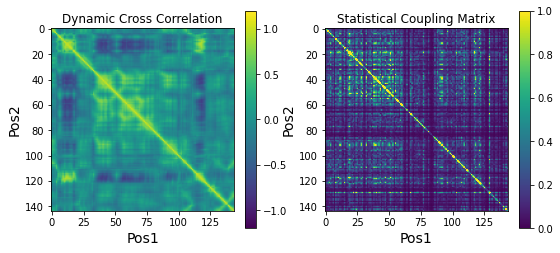

In [26]:
import matplotlib.pyplot as plt
#image MD and Csca matrix
plt.rcParams['figure.figsize'] = 9, 4
plt.subplot(121)
plt.imshow(MD_corr_keep, vmin=-1.2,vmax=1.2); plt.colorbar();
plt.xlabel('Pos1', fontsize=14)
plt.ylabel('Pos2', fontsize=14)
plt.title("Dynamic Cross Correlation")
plt.subplot(122)
plt.imshow(Csca_keep, vmin=0, vmax=1); plt.colorbar();
plt.xlabel('Pos1', fontsize=14)
plt.ylabel('Pos2', fontsize=14)
plt.title("Statistical Coupling Matrix")

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1     group2     meandiff  lower   upper  reject
-----------------------------------------------------
  1          2         0.1361   0.0642  0.208   True 
  1          3         0.1826   0.0677  0.2976  True 
  1          4         0.1012   0.0082  0.1942  True 
  1    not in same IC  0.0349   -0.028  0.0979 False 
  2          3         0.0466   -0.056  0.1491 False 
  2          4        -0.0349  -0.1121  0.0423 False 
  2    not in same IC -0.1011  -0.1367 -0.0656  True 
  3          4        -0.0814  -0.1997  0.0369 False 
  3    not in same IC -0.1477  -0.2441 -0.0512  True 
  4    not in same IC -0.0662  -0.1351  0.0027 False 
-----------------------------------------------------


/gpfs52/data/walker_lab/miniconda3/envs/sca/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'Dyamic Cross Correlation for Pairs of Positions in Same and Different Sectors')

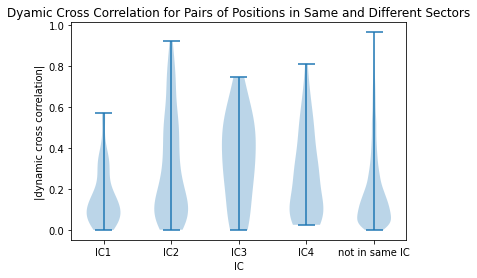

In [24]:
from  scipy.stats import pearsonr, spearmanr, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

#within IC correlations statistical analysis

def inSameIC(i,j):
    if whichIC(i) == whichIC(j) and whichIC(i) != -1:
        return True
    return False

def inAnyIC(i):
    for ic in ics:
        if str(i) in ic:
            return True
    return False

def whichIC(i):
    j=1
    for ic in ics:
        if str(i) in ic:
            return j
        j+=1
    return -1



individual_ic_correlation = {}
for i in range(1, len(ics)+1):
    individual_ic_correlation[i] = []
any_ic_correlation = []
not_same_ic_correlation = []
no_ic_correlation = []
for i in range(0, Csca_keep.shape[0]):
    for j in range(i+1, Csca_keep.shape[0]):
        if inSameIC(ats_keep[i],ats_keep[j]):
            individual_ic_correlation[whichIC(ats_keep[i])].append(MD_corr_keep[i,j])
            any_ic_correlation.append(MD_corr_keep[i,j])
        elif inAnyIC(ats_keep[i]) and inAnyIC(ats_keep[j]):
            any_ic_correlation.append(MD_corr_keep[i,j])
            not_same_ic_correlation.append(MD_corr_keep[i,j])
        else:
            no_ic_correlation.append(MD_corr_keep[i,j])
            not_same_ic_correlation.append(MD_corr_keep[i,j])

ic_plot_data = [abs(np.array(individual_ic_correlation[1])), abs(np.array(individual_ic_correlation[2])), abs(np.array(individual_ic_correlation[3])), \
               abs(np.array(individual_ic_correlation[4])),abs(np.array(not_same_ic_correlation))]
ic_plot_labels = ["","IC1", "IC2", "IC3", "IC4", "not in same IC"]

favlue, pvalue = f_oneway(abs(np.array(individual_ic_correlation[1])), abs(np.array(individual_ic_correlation[2])), abs(np.array(individual_ic_correlation[3])), \
               abs(np.array(individual_ic_correlation[4])),abs(np.array(not_same_ic_correlation)))

IC_list = []
corr_list = []
for i in abs(np.array(individual_ic_correlation[1])):
    IC_list.append("1")
    corr_list.append(i)
    
for i in abs(np.array(individual_ic_correlation[2])):
    IC_list.append("2")
    corr_list.append(i)
    
for i in abs(np.array(individual_ic_correlation[3])):
    IC_list.append("3")
    corr_list.append(i)
    
for i in abs(np.array(individual_ic_correlation[4])):
    IC_list.append("4")
    corr_list.append(i)
    
for i in abs(np.array(not_same_ic_correlation)):
    IC_list.append("not in same IC")
    corr_list.append(i)
    
data = {"correlation":corr_list, "IC_label":IC_list}
df = pd.DataFrame(data)

m_comp = pairwise_tukeyhsd(endog=df["correlation"], groups=df["IC_label"], alpha=0.05)
print("ANOVA multiple comparisons table")
print(m_comp)

plt.figure()
ax = plt.subplot(111)
ax.violinplot(ic_plot_data)
ax.set_xticklabels(ic_plot_labels)
ax.set_xlabel("IC")
ax.set_ylabel("|dynamic cross correlation|")
ax.set_title("Dyamic Cross Correlation for Pairs of Positions in Same and Different Sectors")
        